# Exploring $k$-Nearest Neighbour model

This notebook is an *exploration* of the $k$-nearest neighbour model for supervised machine learning cclassification tasks. Here we use a mixture of self reasoning and books/papers scouting to get a full 

## The idea underlying $k$-NN
When we think about data is usefull to have a feaure space $\mathcal{X}$ that can be visualized, thus it is often very convenient to use $\mathcal{X} \subseteq \mathbb{R}^2$ this allows to use the plane as $\mathcal{X}$ and the color or shape of points to identify classes.

If we think about linear regression

In [23]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.datasets import make_blobs

n_samples = 100
n_features = 2
n_blobs = 6

X_reg, y_reg = make_regression(n_samples, n_features)
X_cl, y_cl = make_blobs(n_samples, n_features, n_blobs)

Let see these examples in a charts

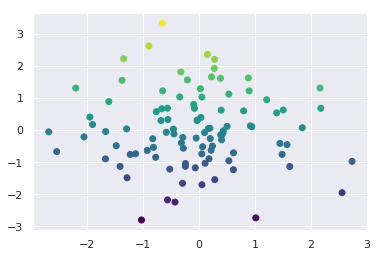

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.scatter(X_reg[:,0],X_reg[:,1], c=y_reg, cmap='viridis')

The regression plot is somehow hard to visualize sicne it has a continuous nature, however we can imagine the colors has identifying the "altitude" of the points, darker points meaning lower points. With this picture it is easy ti visualize a plane that cuts the set into ``HIGH`` and ``LOW`` altitude points effectievly defining a classification strategy based on a linear method (as a matter of fact logistic regression makes something different, but the basic idea is not much different).

Let also see the blobs example

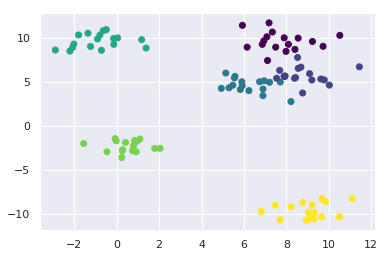

In [25]:
plt.scatter(X_cl[:,0], X_cl[:,1], c=y_cl, cmap='viridis')

This is clearly a whole different story, the dataset now contains ``n_blobs`` groups of points (which we can visualize with colors) that are clustered together, however we can imagine a classification task not so easy due to he overlap between classes. Just for comparison let look at the sama data without coloring for labels.

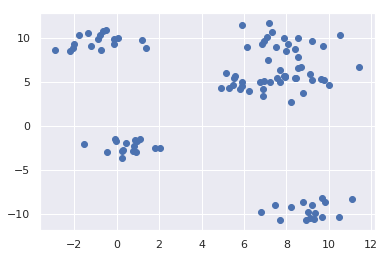

In [26]:
plt.scatter(X_cl[:,0], X_cl[:,1])

The idea of $k$-NN is to leverage the fact that classes are somehow *local* in the sense that around many points of a class $c_i$ there whill points of the same class. To see this we first train a $k$-NN with the whole dataset (bad idea in real world) and then classify a grid of points in the plane

In [36]:
from sklearn.neighbors import KNeighborsClassifier
k = 8
kNN = KNeighborsClassifier(k)
kNN.fit(X_cl,y_cl)
n_grid = 50
X1 = np.linspace(np.min(X_cl[:,0]), np.max(X_cl[:,0]), n_grid)
X2 = np.linspace(np.min(X_cl[:,1]), np.max(X_cl[:,1]), n_grid)
tmp = []
for x1 in X1:
    for x2 in X2:
        tmp.append([x1,x2])
X_grid = np.array(tmp)
y_grid = kNN.predict(X_grid)

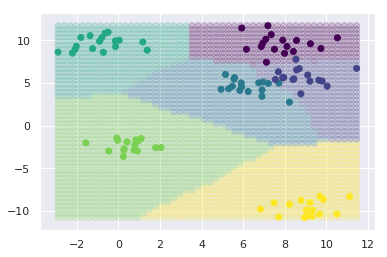

In [39]:
plt.scatter(X_grid[:,0], X_grid[:,1], c=y_grid, cmap='viridis', alpha=0.2)
plt.scatter(X_cl[:,0], X_cl[:,1], c=y_cl, cmap='viridis')

The above chart shows the acutal partitioning of the plane into classes that is operated by the $k$ nearest neighbour algorithm when $k=8$. Each point of the grid is associated with the classes of the majority of $k$ nearest neighbour where the distance is evaluated in Euclidean metric. One can see the intuitive idea that the regions of the plane defined by $k$-NN are not regular and are somehow data driven. In the next part we will see how the performance of $k$-NN can be tested and how the quality of the prediction is influenced by the parameter $k$. However one can immediately see that some points are quite hard to correctly clasify due to the intersection between the classes.